In [1]:
import torch
from PIL import Image
from tqdm.auto import tqdm
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
import json

data_dir = "data/polyvore/"
with open(f"{data_dir}train_no_dup.json", "r", encoding="utf-8") as f:
    outfits = json.load(f)

In [3]:
outfits[0]

{'name': 'Casual',
 'views': 8743,
 'items': [{'index': 1,
   'name': 'mock neck embroidery suede sweatshirt',
   'price': 24.0,
   'likes': 10,
   'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194508109',
   'categoryid': 4495},
  {'index': 2,
   'name': 'luxe double zip hooded jacket',
   'price': 150.0,
   'likes': 2250,
   'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188778349',
   'categoryid': 25},
  {'index': 3,
   'name': 'citizens humanity high rise rocket hem jean',
   'price': 248.0,
   'likes': 2437,
   'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188977857',
   'categoryid': 27},
  {'index': 4,
   'name': 'suede tie short boots',
   'price': 37.0,
   'likes': 2,
   'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194942557',
   'categoryid': 261},
  {'index': 5,
   'name': 'cloth travel school backpack',
   'price': 22.0,
   'likes': 2,
   'image': 'http://img2.polyvoreim

In [4]:
import os
out_dir = "data/Re-PolyVore/all_together/"
# in_dirs = os.listdir("data/Re-PolyVore")

# for dir in tqdm(in_dirs):
#     if dir != "all_together":
#         files = os.listdir(f"data/Re-PolyVore/{dir}")
#         for file in tqdm(files, leave=False):
#             if ".jpg" in file:
#                 img = Image.open(f"data/Re-PolyVore/{dir}/{file}")
#                 img.save(f"{out_dir}{file}")

In [5]:
outfits_dict = {}
for i in range(len(outfits)):
    outfits_dict.update({outfits[i]["set_id"]: {"ind": i}})


for item in tqdm(os.listdir(out_dir)):
    try:
        outfit, suff = item.split("_", 1)
        num = int(suff.split(".")[0])
        if outfits_dict.get(outfit) is not None:
            item_dict = outfits[outfits_dict[outfit]["ind"]]["items"][num-1]
            if outfits_dict[outfit].get("items") is None:
                outfits_dict[outfit].update({"items": [item_dict | {"path": out_dir+item}]})
            else:
                outfits_dict[outfit]["items"].append(item_dict | {"path": out_dir+item})
    except: continue

  0%|          | 0/126928 [00:00<?, ?it/s]

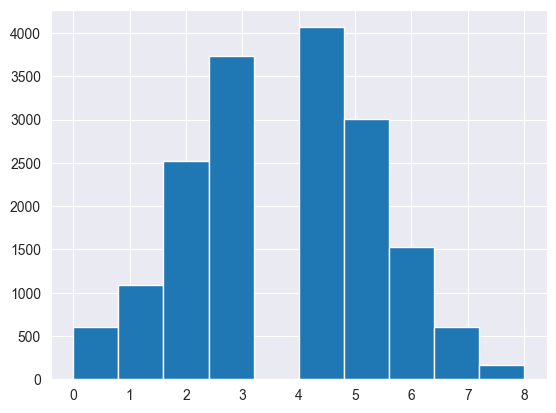

In [6]:
o_len = []
for _, O in outfits_dict.items():
    if O.get("items") is not None:
        o_len.append(len(O["items"]))
    else:
        o_len.append(0)

plt.hist(o_len)
plt.show()

In [7]:
# image = Image.open("data/Re-PolyVore/all_together/100167523_10.jpg")
# image.show()

In [8]:
# with open("data/Re-PolyVore_encoded_with_FashionClip.json", "w", encoding="utf-8") as f:
#     json.dump(outfits_dict, f, indent=4)

In [9]:
# import yaml 
# with open("data/Re-PolyVore_encoded_with_FashionClip.json", "r", encoding="utf-8") as f:
#     test_dict = yaml.safe_load(f)

In [10]:
from fashion_clip.fashion_clip import FashionCLIP
model = FashionCLIP('fashion-clip')

In [11]:
with open("data/Re-PolyVore_encoded_with_FashionClip.json", "r", encoding="utf-8") as f:
    outfits_dict = json.load(f)

In [12]:
with torch.no_grad(): 
    
    # with open("data/Re-PolyVore_encoded_with_FashionClip.json", "r", encoding="utf-8") as f:
    #     outfits_dict = json.load(f)
        
    for ind, (id, outfit) in enumerate(tqdm(outfits_dict.items())):
        if outfit.get("processed") is None:
            if outfit.get("items") is not None:
                img_paths = [item["path"] for item in outfit["items"]]
                texts = [item['name'] for item in outfit["items"]]
                batch_size = len(outfit["items"])
                img_features = [i.tolist() for i in model.encode_images(img_paths, batch_size=batch_size)]
                text_features = [t.tolist() for t in model.encode_text(texts, batch_size=batch_size)]
                for item, i, t in zip(outfit["items"], img_features, text_features):
                    # item["image_features"] = model.encode_images([item["path"]], batch_size=1)[0]
                    # item["text_features"] = model.encode_text([item["image"]], batch_size=1)[0]
                    item["image_features"] = i
                    item["text_features"] = t
                outfit["processed"] = "True"
        if (ind + 1) % 500 == 0:  
            with open("data/Re-PolyVore_encoded_with_FashionClip.json", "w", encoding="utf-8") as f:
                json.dump(outfits_dict, f, indent=4)
                
    with open("data/Re-PolyVore_encoded_with_FashionClip.json", "w", encoding="utf-8") as f:
        json.dump(outfits_dict, f, indent=4)

  0%|          | 0/17316 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.16s/it]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.18it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.71it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.74it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.85it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.18it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.70it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.81it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.74it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.79it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.73it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.00it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.11it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.56it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.00it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.37it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.93it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.67it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.54it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.28it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.11it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.71it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.45it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.70it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.84it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.78it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.40it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.97it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.51it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.32it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.74it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.43it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.46it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.86it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.56it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.19it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.22it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.69it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.92it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.06it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.22it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.87it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.82it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.86it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.40it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.99it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.32it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.15it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.85it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.30it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.97it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.50it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.41it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.58it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.33it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.37it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.63it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.32it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.29it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.23it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.28it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.33it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.99it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.51it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.46it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.90it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.85it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.76it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.08it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.36it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.09it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.00it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.05it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.53it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.88it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.74it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.69it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.76it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.02it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.68it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.73it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.34it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.00it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.40it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.55it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.80it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.83it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.65it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.60it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.16it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.71it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.79it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.03it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.94it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.14it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.19it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.75it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.71it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.13it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.83it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.63it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.51it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.29it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.34it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.94it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.01it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.93it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.77it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.63it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.04it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.04it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.17it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.29it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.25it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.25it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.31it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.45it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.89it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.59it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.53it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.07it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.22it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.03it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.65it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.61it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.16it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.03it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.21it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.50it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.33it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.03it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.11it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.34it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.21it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.44it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.31it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.65it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.71it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.33it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.04it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.00it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.26it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.42it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.14it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.23it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.69it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.26it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.81it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.51it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.79it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.69it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.50it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.80it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.11it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.46it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.03it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.19it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.27it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.53it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.07it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.21it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.55it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.93it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.13it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.37it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.89it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.15it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.79it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.55it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.66it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.35it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.56it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.47it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.51it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.49it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.40it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.69it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.61it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.51it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.33it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.04it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.84it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.12it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.03it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.23it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.00it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.57it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.36it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.80it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.50it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.45it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.17it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.65it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.51it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.01it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.19it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.39it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.22it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.07it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.17it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.29it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.14it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.19it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.09it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.79it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.62it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.01it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.33it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.38it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.09it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.20it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.00it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.53it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.38it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.32it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.14it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.23it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.54it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.62it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.41it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.03it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.91it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.15it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.41it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.67it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.35it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.38it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.62it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.98it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.34it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.48it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.20it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.88it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.78it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.30it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.57it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.08it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.43it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.45it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.18it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.02it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.27it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.08it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.82it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.68it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.78it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.95it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.22it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.08it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.75it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.30it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.04it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.49it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.34it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.13it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.64it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.94it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.57it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.01it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.11it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.75it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.98it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.22it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.38it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.46it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.33it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.93it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.09it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.90it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.76it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.57it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.96it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.97it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.22it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.02it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.69it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.60it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.63it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.91it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.00it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.36it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.90it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.48it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.71it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.12it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.44it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.96it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.38it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.53it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.67it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.16it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.62it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.93it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.82it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.10it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.80it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.14it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.09it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.75it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.40it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.06it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.42it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.01it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.37it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.16it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.66it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.79it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.18it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.14it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.76it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.26it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.16it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.98it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.52it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.80it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.63it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.53it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.76it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.29it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.18it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.34it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.02it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.55it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.91it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.91it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.88it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.12it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.67it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.41it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.83it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.30it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.16it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.96it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.30it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.13it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.17it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.13it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.94it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.91it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.28it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.40it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.66it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.67it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.95it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.66it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.02it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.57it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.29it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.22it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.28it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.52it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.50it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.89it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.36it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.18it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.24it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.16it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.98it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.42it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.60it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.09it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.29it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.76it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.18it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.72it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.61it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.96it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.94it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.11it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.97it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.82it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.71it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.10it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.06it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.26it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.02it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.70it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.49it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.04it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.84it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.54it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.66it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.86it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.37it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.12it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.15it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.62it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.26it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.09it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.71it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.43it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.43it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.75it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.25it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.30it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.39it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.03it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.00it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.64it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.35it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.04it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.59it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.65it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.30it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.50it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.75it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.82it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.62it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.16it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.02it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.21it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.80it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.08it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.49it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.71it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.47it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.15it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.93it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.24it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.04it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.28it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.83it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.33it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.23it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.61it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.30it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.41it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.76it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.72it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.12it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.57it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.19it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.13it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.72it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.93it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.82it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.25it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.63it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.88it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.04it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.49it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.73it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.47it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.24it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.22it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.66it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.46it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.94it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.18it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.96it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.13it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.93it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.41it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.59it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.76it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.45it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.03it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.13it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.92it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.76it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.11it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.63it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.78it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.64it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.21it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.78it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.62it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.09it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.89it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.07it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.30it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.05it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.58it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.29it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.56it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.22it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.20it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.48it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.73it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.79it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.49it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.89it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.48it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.74it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.48it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.78it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.63it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.92it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.04it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.87it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.24it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.24it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.48it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.13it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.18it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.46it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.00it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.24it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.20it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.84it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.49it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.92it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.91it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.61it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.54it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.31it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.37it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.10it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.79it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.92it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.28it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.02it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.82it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.60it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.95it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.56it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.38it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.57it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.77it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.26it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.12it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.98it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.29it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.93it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.75it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.16it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.97it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.99it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.90it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.14it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.26it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.12it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.95it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.80it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.45it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.30it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.16it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.40it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.94it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.56it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.71it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.30it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.60it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.02it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.19it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.01it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.54it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.62it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.68it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.14it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.99it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.98it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.28it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.03it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.07it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.69it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.08it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.92it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.33it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.80it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.14it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.22it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.53it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.70it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.93it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.97it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.03it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.40it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.35it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.92it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.99it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.10it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.15it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.01it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.84it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.00it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.03it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.79it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.71it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.71it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.01it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.38it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.01it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.04it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.40it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.66it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.33it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.66it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.70it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.85it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.02it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.94it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.39it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.88it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.38it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.93it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.59it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.55it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.35it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.87it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.14it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.12it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.29it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.84it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.91it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.61it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.18it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.64it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.64it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.89it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.49it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.60it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.57it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.85it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.31it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.74it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.07it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.25it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.63it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.80it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.88it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.83it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.59it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.89it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.51it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.61it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.77it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.26it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.52it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.05it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.10it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.57it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.55it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.23it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.22it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.40it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.91it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.55it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.33it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.02it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.04it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.92it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.79it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.00it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.98it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.10it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.93it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.79it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.11it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.94it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.11it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.00it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.86it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.30it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.74it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.63it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.03it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.38it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.90it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.23it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.54it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.27it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.09it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.72it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.32it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.65it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.20it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.04it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.84it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.95it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.18it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.34it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.35it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.88it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.76it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.81it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.26it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.84it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.04it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.55it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.71it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.18it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.03it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.94it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.00it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.53it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.77it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.70it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.04it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.43it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.94it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.29it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.75it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.56it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.60it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.26it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.05it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.15it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.54it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.20it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.09it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.80it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.30it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.87it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.69it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.11it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.29it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.54it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.85it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.89it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.36it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.90it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.30it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.15it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.36it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.16it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.38it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.00it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.59it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.56it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.26it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.15it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.03it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.04it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.68it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.00it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.49it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.12it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.49it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.56it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.60it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.06it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.10it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.08it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.54it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.06it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.96it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.08it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.84it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.72it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.47it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.15it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.18it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.08it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.24it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.04it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.41it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.38it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.40it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.53it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.35it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.29it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.02it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.03it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.98it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.13it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.13it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.26it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.28it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.77it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.95it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.76it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.98it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.65it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.75it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.92it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.02it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.12it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.45it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.68it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.91it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.65it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.29it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.01it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.32it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.07it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.87it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.59it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.93it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.67it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.91it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.55it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.09it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.03it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.71it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.76it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.67it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.93it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.06it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.12it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.80it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.99it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.08it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.56it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.79it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.52it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.46it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.97it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.33it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.78it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.62it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.03it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.20it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.92it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.03it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.51it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.61it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.90it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.17it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.52it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.23it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.31it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.97it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.17it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.98it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.00it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.17it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.38it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.25it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.96it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.39it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.95it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.65it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.39it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.40it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.61it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.98it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.04it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.98it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.16it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.78it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.30it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.00it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.40it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.15it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.02it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.21it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.35it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.92it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.41it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.77it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.00it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.47it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.26it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.32it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.31it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.12it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.07it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.13it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.49it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.27it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.34it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.51it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.98it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.21it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.00it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.39it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.09it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.94it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.30it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.75it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.56it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.16it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.52it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.05it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.78it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.22it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.88it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.17it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.01it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.75it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.54it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.26it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.27it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.95it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.36it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.28it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.25it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.13it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.01it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.22it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.82it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.07it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.45it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.19it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.60it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.31it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.93it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.57it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.97it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.19it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.49it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.35it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.29it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.20it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.11it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.25it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.52it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.02it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.94it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.72it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.77it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.22it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.28it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.03it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.34it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.45it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.42it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.05it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.35it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.40it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.25it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.87it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.80it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.59it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.93it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.78it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.20it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.26it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.61it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.44it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.71it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.83it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.08it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.87it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.54it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.80it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.87it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.03it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.24it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.22it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.08it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.82it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.30it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.15it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.99it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.60it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.46it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.64it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.02it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.80it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.26it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.16it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.40it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.45it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.44it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.90it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.32it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.75it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.68it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.17it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.23it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.40it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.91it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.67it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.98it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.71it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.32it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.72it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.14it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.48it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.54it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.20it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.63it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.56it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.78it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.11it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.34it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.28it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.09it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.91it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.26it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.13it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.32it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.39it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.21it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.00it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.95it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.20it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.36it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.29it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.54it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.56it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.10it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.50it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.57it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.20it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.06it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.83it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.55it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.60it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.06it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.88it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.97it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.13it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.93it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.98it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.42it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.05it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.26it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.51it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.59it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.77it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.08it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.27it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.51it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.55it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.00it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.19it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.61it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.04it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.73it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.90it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.87it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.18it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.38it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.75it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.69it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.10it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.79it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.52it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.87it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.74it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.08it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.49it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.06it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.97it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.34it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.63it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.11it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.63it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.03it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.11it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.21it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.00it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.47it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.77it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.23it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.70it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.46it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.17it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.12it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.57it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.70it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.62it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.70it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.40it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.77it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.84it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.56it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.97it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.41it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.90it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.09it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.95it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.57it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.70it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.23it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.55it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.10it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.40it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.18it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.19it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.35it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.14it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.29it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.97it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.53it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.04it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.82it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.21it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.97it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.41it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.56it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.97it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.75it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.90it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.13it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.11it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.69it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.74it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.91it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.35it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.09it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.65it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.03it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.02it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.52it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.11it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.28it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.20it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.29it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.81it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.32it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.47it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.13it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.36it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.80it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.81it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.46it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.85it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.30it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.61it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.06it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.22it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.65it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.03it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.93it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.15it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.29it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.51it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.90it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.27it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.16it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.87it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.23it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.71it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.32it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.74it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.80it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.26it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.94it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.44it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.66it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.11it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.48it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.82it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.34it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.52it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.93it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.08it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.25it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.01it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.63it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.43it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.20it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.82it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.17it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.16it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.44it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.16it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.22it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.02it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.93it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.49it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.12it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.94it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.18it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.17it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.46it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.65it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.74it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.57it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.47it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.80it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.17it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.84it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.84it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.49it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.87it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.67it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.06it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.38it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.13it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.34it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.50it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.51it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.23it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.94it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.84it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.66it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.36it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.82it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.48it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.76it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.09it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.20it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.70it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.99it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.89it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.61it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.51it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.77it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.60it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.57it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.62it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.69it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.28it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.40it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.88it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.12it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.02it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.14it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.80it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.78it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.52it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.15it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.04it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.02it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.90it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.96it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.90it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.61it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.53it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.32it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.62it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.16it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.58it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.05it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.91it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.21it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.94it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.93it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.26it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.01it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.34it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.08it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.21it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.03it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.45it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.53it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.90it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.11it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.21it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.27it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.05it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.52it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.32it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.05it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.05it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.12it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.49it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.38it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.95it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.30it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.94it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.55it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.99it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.53it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.90it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.19it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.39it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.48it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.21it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.79it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.47it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.90it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.76it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.85it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.71it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.26it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.16it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.87it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.27it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.91it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.05it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.22it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.24it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.08it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.73it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.77it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.09it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.66it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.08it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.14it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.26it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.11it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.89it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.22it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.23it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.41it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.96it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.27it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.38it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.14it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.33it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.63it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.25it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.30it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.63it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.82it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.21it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.89it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.37it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.11it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.92it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.14it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.15it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.54it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.77it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.95it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.38it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.29it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.99it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.29it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.14it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.69it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.74it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.18it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.99it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.65it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.20it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.45it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.28it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.30it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.92it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.96it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.07it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.63it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.10it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.45it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.98it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.65it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.01it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.13it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.88it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.07it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.72it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.23it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.16it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.57it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.40it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.00it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.42it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.67it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.90it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.30it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.81it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.35it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.96it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.54it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.57it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.42it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.24it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.04it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.14it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.55it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.17it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.19it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.08it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.92it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.19it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.98it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.56it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.33it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.68it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.58it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.16it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.44it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.86it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.54it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.52it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.63it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.21it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.51it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.33it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.06it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.94it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.19it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.02it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.63it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.67it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.56it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.15it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.16it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.36it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.07it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.54it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.69it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.65it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.38it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.17it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.79it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.13it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.90it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.28it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.65it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.11it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.63it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.43it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.37it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.64it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.17it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.51it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.52it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.81it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.80it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.95it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.28it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.00it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.72it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.99it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.37it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.74it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.26it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.05it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.29it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.93it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.28it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.28it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.99it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.08it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.43it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.83it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.17it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.19it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.78it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.47it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.90it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.15it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.22it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.23it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.18it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.67it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.11it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.74it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.55it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.84it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.41it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.19it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.30it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.21it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.38it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.90it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.91it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.76it/s]


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.57it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.91it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.80it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.28it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.66it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.15it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.89it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.69it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.16it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.48it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.25it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.02it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.01it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.29it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.53it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.41it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.24it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.23it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.85it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.62it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.35it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.23it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.99it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.04it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.03it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.97it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.41it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.36it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.39it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.22it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.16it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.89it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.41it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.20it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.46it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.16it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.69it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.07it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.88it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.40it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.28it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.47it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.95it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.78it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.34it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.81it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.16it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.38it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.98it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.66it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.27it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.76it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.30it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.01it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.63it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.96it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.56it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.30it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.04it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.09it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.33it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.24it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.44it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.72it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.18it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.46it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.10it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.03it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.49it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.82it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.08it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.79it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.16it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.11it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.08it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.10it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.19it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.42it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.84it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.32it/s]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.34it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.11it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.77it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.00it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.83it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.13it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.61it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.53it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.16it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.05it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.84it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.90it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.86it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.42it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.28it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.86it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.51it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.84it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.34it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.18it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.63it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.40it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.99it/s]


Map:   0%|          | 0/6 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.68it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.53it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.67it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.22it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.13it/s]


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.85it/s]


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47.57it/s]


ValueError: I/O operation on closed file.